In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from spmf import Spmf
import sys
sys.path.append('..')
from utility_function import utility_function as uf

In [2]:
data = pd.read_csv('../../../alarm_data_batch/'+'pivoted_data.csv', low_memory=False)
text_vars = ['ShortYellowAlarm', 'YellowAlarm', 'sMode', 'SoftInop', 'RedAlarm', 'HardInop', 'EctSta', 'RitSta']

<AxesSubplot:>

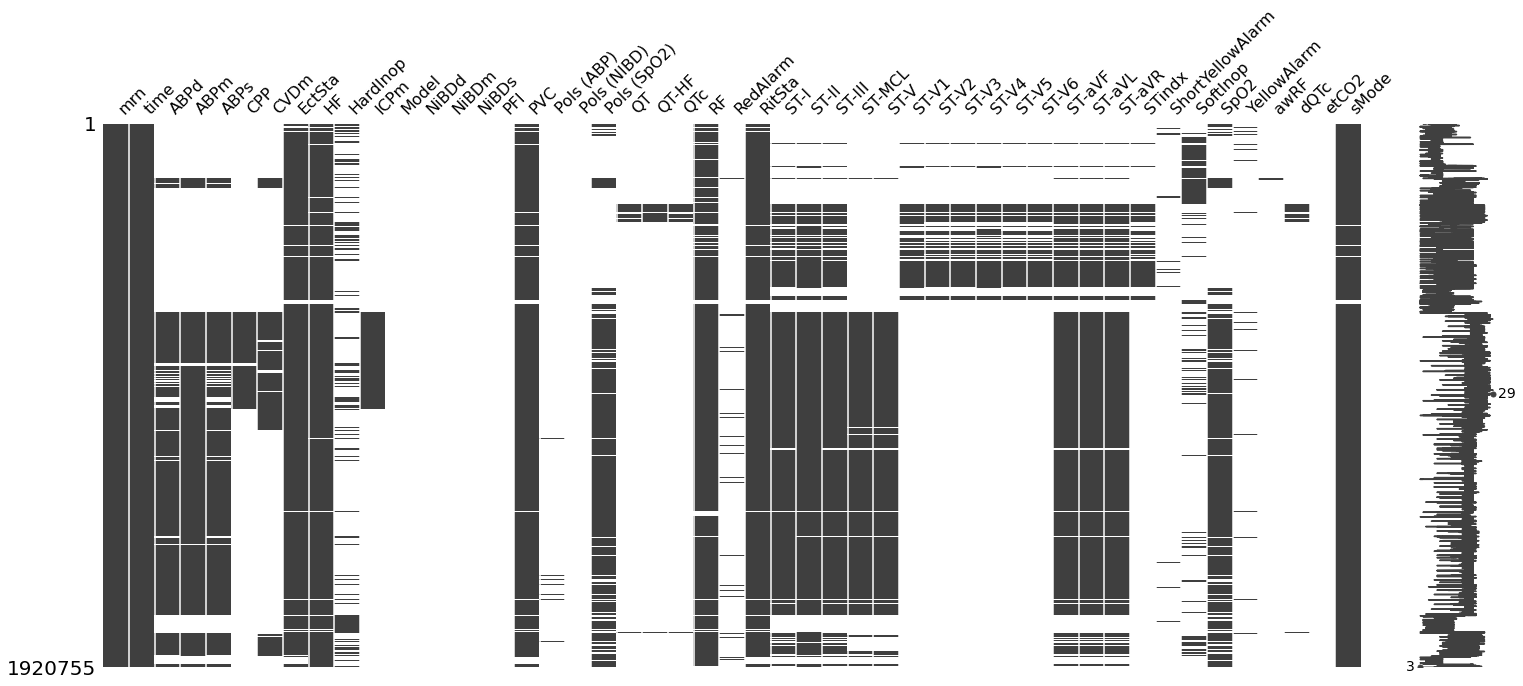

In [3]:
msno.matrix(data)

In [4]:
data_txt = data.loc[:, np.hstack((['mrn', 'time'], text_vars))]
data_txt = data_txt.drop(columns='sMode')

data_num = data.loc[:, ~data.columns.isin(text_vars)]
data_num = data_num.drop(columns=['Model', 'NiBDd', 'NiBDm', 'NiBDs', 'PFI', 'Pols (NIBD)', 'etCO2'])

In [26]:
data_txt_filtered_dummy_minute = uf.filter_alarms(data_txt, '30Min')

In [27]:
data_txt_filtered_dummy_minute.sum()

RedAlarm_*** ABP losgeraakt             31.0
RedAlarm_*** ABPm   hoog                34.0
RedAlarm_*** ABPs   hoog                64.0
RedAlarm_*** ABPs   laag               145.0
RedAlarm_*** Apneu                      89.0
RedAlarm_*** Brady (pols)                7.0
RedAlarm_*** Desaturatie               262.0
RedAlarm_*** Extreme brady              53.0
RedAlarm_*** Extreme tachy              29.0
RedAlarm_*** ICPm   hoog                 8.0
RedAlarm_*** Tachy (pols)                3.0
RedAlarm_*** VTach                      36.0
RedAlarm_*** Vent fibr/tach              8.0
RedAlarm_*** asystolie                  75.0
ShortYellowAlarm_*  HF     hoog        125.0
ShortYellowAlarm_*  HF     laag         88.0
ShortYellowAlarm_* AFIB                 37.0
ShortYellowAlarm_* Einde AFIB           24.0
ShortYellowAlarm_* Multivorm PVC''s      1.0
ShortYellowAlarm_* Onderbroken VT      109.0
ShortYellowAlarm_* PM niet gevolgd      14.0
ShortYellowAlarm_* PM pacet niet         5.0
ShortYello

In [22]:
# change column names to create the transaction db
names_to_idx = pd.DataFrame()
names_to_idx.loc[:, 'name'] = data_txt_filtered_dummy_minute.columns
names_to_idx.loc[:, 'code'] = np.arange(0, data_txt_filtered_dummy_minute.shape[1] )
data_txt_filtered_dummy_minute.columns = names_to_idx.code

In [23]:
uf.to_transaction_db(data_txt_filtered_dummy_minute, time=True)

In [24]:
algos = ['PrefixSpan', 'Fournier08-Closed+time', 'HirateYamana']
times = [False, True, True]
argss = [[0.6, 3],
         [.4, 1, 2, 1, 8]]

In [25]:
uf.run_spmf(algos[0], times[0], argss[0])

>/home/michelav/.local/lib/python3.8/site-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 22 ms
 Frequent sequences count : 9
 Max memory (mb) : 9.202781677246094
 minsup = 10 sequences.
 Pattern count : 9


        pattern  sup
0          [24]   15
1      [24, 24]   14
2  [24, 24, 24]   13
3          [40]   10
4      [40, 24]   10
5  [40, 24, 24]   10
6      [40, 40]   10
7  [40, 40, 40]   10
8  [40, 40, 24]   10


In [11]:
names_to_idx

,name,code
0,RedAlarm_*** ABP losgeraakt,0
1,RedAlarm_*** ABPm hoog,1
2,RedAlarm_*** ABPs hoog,2
3,RedAlarm_*** ABPs laag,3
4,RedAlarm_*** Apneu,4
5,RedAlarm_*** Brady (pols),5
6,RedAlarm_*** Desaturatie,6
7,RedAlarm_*** Extreme brady,7
8,RedAlarm_*** Extreme tachy,8
9,RedAlarm_*** ICPm hoog,9
